In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d akshaydattatraykhare/diabetes-dataset

Dataset URL: https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset
License(s): CC0-1.0
  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 42.2MB/s]


In [4]:
!unzip /content/diabetes-dataset.zip

Archive:  /content/diabetes-dataset.zip
  inflating: diabetes.csv            


In [5]:
dataset = pd.read_csv('/content/diabetes.csv', na_values= ['?'])
dataset.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [6]:
dataset.shape

(768, 9)

In [7]:
dataset.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
dataset.describe( include ='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
dataset["Insulin"].value_counts()

,count
Insulin,
0,374
105,11
130,9
140,9
120,8
...,...
178,1
127,1
510,1


In [11]:
normal_insulin = dataset[dataset['Outcome'] == 0]['Insulin']
diabetic_insulin = dataset[dataset['Outcome'] == 1]['Insulin']

print("Insulin values in NORMAL cases (Outcome=0):")
print(normal_insulin.unique())


print("\nInsulin values in DIABETIC cases (Outcome=1):")
print(diabetic_insulin.unique())

Insulin values in NORMAL cases (Outcome=0):
[  0  94  83 235 140 110  54 192  70  82  36  23 342 142 128  38 100 270
  71 125 176  48  64 228  76  40 152  18  37  51 135  49  50  92 325  63
 284 119 204 485  53 105 285  78  55  44 190  87 120  56  32 744  45  88
 194 680 402 375 130  67  57 116 278 122 155 545  75 215  42 148  85 231
 168  68  52  58 255  73 108  74  43 293  66  89 158  84  72 182  59  81
 196 415 275 115 165 310  61 170 145  60  95 210 480 265 193  79  86 326
 188 106  65 166  77 126 330 230  25  41 272  15 160  90 183  46 440 200
 132 240 205 180 335 387  22 291 178  16 112]

Insulin values in DIABETIC cases (Outcome=1):
[  0 168  88 543 846 175 230  96 146 115 245 207 240 300 304  90 110 220
  36 135 495 100  99 145 225 155 114 156 130  58 160 210  48 318 280 271
 129 478 370 192 176 258 150  74 182 194 360 184 132 180 205  29 120 171
 167 249 325 140 465 285 579 474 277  14  64 237 191 328 250 122 105 165
 215 190 274 600 185 126 293 321 144  91 159 540  70 231 125

In [12]:
insulin_normal = dataset[(dataset['Outcome'] == 0) & (dataset['Insulin'] != 0)]['Insulin']
insulin_diabetic = dataset[(dataset['Outcome'] == 1) & (dataset['Insulin'] != 0)]['Insulin']

median_normal_insulin = insulin_normal.median()
median_diabetic_insulin = insulin_diabetic.median()

print(f"Median Insulin (Normal): {median_normal_insulin}")
print(f"Median Insulin (Diabetic): {median_diabetic_insulin}")

Median Insulin (Normal): 102.5
Median Insulin (Diabetic): 169.5


In [13]:
dataset.loc[(dataset['Outcome'] == 0) &  ((dataset['Insulin'] < 10) | (dataset['Insulin'] > 250)) &  (dataset['Insulin'] != 0),'Insulin'] = median_normal_insulin
dataset.loc[ (dataset['Outcome'] == 1) & ((dataset['Insulin'] < 15) | (dataset['Insulin'] > 300)) & (dataset['Insulin'] != 0), 'Insulin'] = median_diabetic_insulin

mean_normal_insulin = dataset[(dataset['Outcome'] == 0) & (dataset['Insulin'] != 0)]['Insulin'].mean()
mean_diabetic_insulin = dataset[(dataset['Outcome'] == 1) & (dataset['Insulin'] != 0)]['Insulin'].mean()

/tmp/ipython-input-13-1447687268.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '102.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataset.loc[(dataset['Outcome'] == 0) &  ((dataset['Insulin'] < 10) | (dataset['Insulin'] > 250)) &  (dataset['Insulin'] != 0),'Insulin'] = median_normal_insulin


In [14]:
dataset.loc[(dataset['Outcome'] == 0) & (dataset['Insulin'] == 0), 'Insulin'] = mean_normal_insulin
dataset.loc[(dataset['Outcome'] == 1) & (dataset['Insulin'] == 0), 'Insulin'] = mean_diabetic_insulin

dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,123.623645,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,45.959132,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,103.066288,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,103.066288,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,161.976923,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,300.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
dataset['Insulin'].value_counts()

,count
Insulin,
103.066288,236
161.976923,138
102.500000,27
169.500000,22
105.000000,11
...,...
22.000000,1
178.000000,1
127.000000,1


In [16]:
glucose_normal = dataset[dataset['Outcome'] == 0]['Glucose']
glucose_diabetic = dataset[dataset['Outcome'] == 1]['Glucose']

print("Glucose values in NORMAL cases (Outcome=0):")
print(glucose_normal.unique())

print("\nGlucose values in DIABETIC cases (Outcome=1):")
print(glucose_diabetic.unique())


Glucose values in NORMAL cases (Outcome=0):
[ 85  89 116 115 110 139 103 126  99  97 145 117 109  88  92 122 138 180
 133 106 159 146  71 105 101 150  73 100  84  44 141  95 129  79   0  62
 112 113  74  83 107  80 123  81 142 144  93 151 125  96  76  78 111 132
 120 118 128 108 154 102  57 147  90 136 114 153 148  87  75 143 119 179
 197 104  91 165 124  86 193 191 155 161  77 137 157 130  61 158  98 131
 127  82  72  94 135 140 134 173 194 166  68 164 189 121  67 152 183 162
  56 175  65]

Glucose values in DIABETIC cases (Outcome=1):
[148 183 137  78 197 125 168 189 166 100 118 107 115 196 119 143 147 158
 102  90 111 171 180 103 176 187 133 114 109 126 131 136 134 122 163  95
 155 160 146 124 162 113  88 117 105 173 170 108 156 188 152 104 179 129
 130 194 181 128 139 159 135 184 140 112 151  85 177 142 164  92 141 123
 138 101 106 161 167 144 182 178   0 165 116 193 172 175 120 145 195  84
 132 186 198 121 150 174  97  80 199 169  93 149 154 190]


In [17]:
median_glucose_normal = dataset[(dataset['Outcome'] == 0) & (dataset['Glucose'] != 0)]['Glucose'].median()
median_glucose_diabetic = dataset[(dataset['Outcome'] == 1) & (dataset['Glucose'] != 0)]['Glucose'].median()

dataset.loc[(dataset['Outcome'] == 0) & ((dataset['Glucose'] < 70) | (dataset['Glucose'] > 140)) &  (dataset['Glucose'] != 0),'Glucose'] = median_glucose_normal

dataset.loc[ (dataset['Outcome'] == 1) & ((dataset['Glucose'] < 80) | (dataset['Glucose'] > 200)) & (dataset['Glucose'] != 0),'Glucose'] = median_glucose_diabetic

mean_glucose_normal = dataset[(dataset['Outcome'] == 0) & (dataset['Glucose'] != 0)]['Glucose'].mean()
mean_glucose_diabetic = dataset[(dataset['Outcome'] == 1) & (dataset['Glucose'] != 0)]['Glucose'].mean()

dataset.loc[(dataset['Outcome'] == 0) & (dataset['Glucose'] == 0), 'Glucose'] = mean_glucose_normal
dataset.loc[(dataset['Outcome'] == 1) & (dataset['Glucose'] == 0), 'Glucose'] = mean_glucose_diabetic

/tmp/ipython-input-17-1026896551.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '105.61368209255534' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataset.loc[(dataset['Outcome'] == 0) & (dataset['Glucose'] == 0), 'Glucose'] = mean_glucose_normal


In [18]:
normal_skin_thickness = dataset[dataset['Outcome'] == 0]['SkinThickness']
diabetic_skin_thickness = dataset[dataset['Outcome'] == 1]['SkinThickness']

print("SkinThickness values in NORMAL cases (Outcome=0):")
print(normal_skin_thickness.unique())

print("\nSkinThickness values in DIABETIC cases (Outcome=1):")
print(diabetic_skin_thickness.unique())


SkinThickness values in NORMAL cases (Outcome=0):
[29 23  0 38 41 15 19 26 11 31 33 25 18 27 21 42 10 60 34 13 35 20 30 22
 28 54 40 39 36 37 17 50 12 24 44 16 32 14 52 43  8 46 45  7 47 48]

SkinThickness values in DIABETIC cases (Outcome=1):
[35  0 32 45 23 19 47 30 33 26 36 37 42 24 39 34 20 51 25 56 14 28 44 41
 18 46 13 27 29 40 22 38 21 15  7 17 31 48 43 49 12 63 99]


In [19]:
normal_nonzero = dataset[(dataset['Outcome'] == 0 )& (dataset['SkinThickness'] != 0)]
diabetic_nonzero = dataset[(dataset['Outcome'] == 1 )& (dataset['SkinThickness'] != 0)]

median_normal = normal_nonzero['SkinThickness'].median()
median_diabetic = diabetic_nonzero['SkinThickness'].median()

print(f"Median SkinThickness (Normal): {median_normal}")
print(f"Median SkinThickness (Diabetic): {median_diabetic}")


Median SkinThickness (Normal): 27.0
Median SkinThickness (Diabetic): 32.0


In [20]:
dataset.loc[ (dataset['Outcome'] == 0) &  ((dataset['SkinThickness'] < 10) | (dataset['SkinThickness'] > 40)) & (dataset['SkinThickness'] != 0), 'SkinThickness'] = median_normal
dataset.loc[ (dataset['Outcome'] == 1) &  ((dataset['SkinThickness'] < 15) | (dataset['SkinThickness'] > 50)) &  (dataset['SkinThickness'] != 0), 'SkinThickness'] = median_diabetic


In [21]:
mean_normal = dataset[(dataset['Outcome'] == 0) & (dataset['SkinThickness'] != 0)]['SkinThickness'].mean()
mean_diabetic = dataset[(dataset['Outcome'] == 1) & (dataset['SkinThickness'] != 0)]['SkinThickness'].mean()

dataset.loc[(dataset['Outcome'] == 0) & (dataset['SkinThickness'] == 0), 'SkinThickness'] = mean_normal
dataset.loc[(dataset['Outcome'] == 1) & (dataset['SkinThickness'] == 0), 'SkinThickness'] = mean_diabetic

print(f"Mean (Normal): {mean_normal:.2f}")
print(f"Mean (Diabetic): {mean_diabetic:.2f}")

dataset.describe()


Mean (Normal): 25.50
Mean (Diabetic): 32.77


/tmp/ipython-input-21-3820515037.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '25.501385041551245' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataset.loc[(dataset['Outcome'] == 0) & (dataset['SkinThickness'] == 0), 'SkinThickness'] = mean_normal


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,118.503836,69.105469,28.038604,123.623645,31.992578,0.471876,33.240885,0.348958
std,3.369578,27.699118,19.355807,7.296100,45.959132,7.884160,0.331329,11.760232,0.476951
min,0.000000,71.000000,0.000000,10.000000,15.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,62.000000,25.376039,103.066288,27.300000,0.243750,24.000000,0.000000
50%,3.000000,111.000000,72.000000,27.000000,103.066288,32.000000,0.372500,29.000000,0.000000
75%,6.000000,131.000000,80.000000,32.772222,161.976923,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,49.000000,300.000000,67.100000,2.420000,81.000000,1.000000


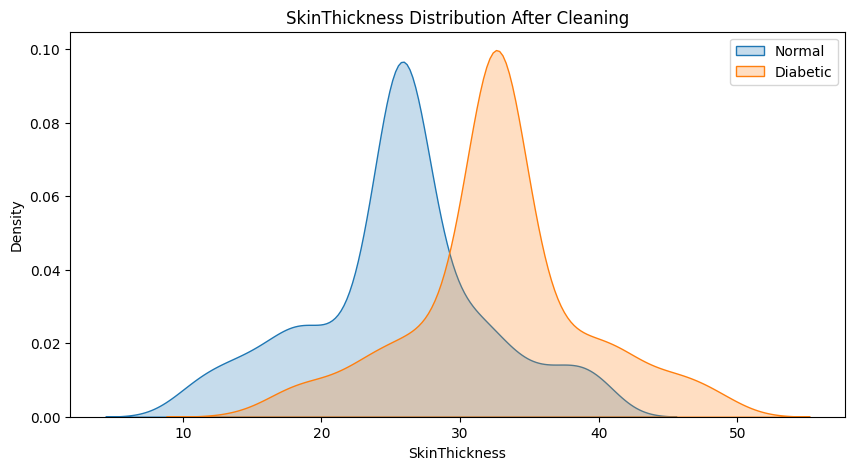

In [22]:
plt.figure(figsize=(10,5))
sns.kdeplot(dataset[dataset['Outcome'] == 0]['SkinThickness'], label='Normal', fill=True)
sns.kdeplot(dataset[dataset['Outcome'] == 1]['SkinThickness'], label='Diabetic', fill=True)
plt.title("SkinThickness Distribution After Cleaning")
plt.legend()
plt.show()


In [23]:
correlation_matrix = dataset.corr()
correlation_with_outcome = correlation_matrix['Outcome']
sorted_correlation = correlation_with_outcome.sort_values(ascending=False)
print("Correlation with 'Outcome' (Sorted from Largest to Smallest):")
sorted_correlation

Correlation with 'Outcome' (Sorted from Largest to Smallest):


,Outcome
Outcome,1.000000
Glucose,0.636052
Insulin,0.611359
SkinThickness,0.475300
BMI,0.292695
Age,0.238356
Pregnancies,0.221898
DiabetesPedigreeFunction,0.173844
BloodPressure,0.065068


In [24]:
dataset['BloodPressure'].unique()

array([ 72,  66,  64,  40,  74,  50,   0,  70,  96,  92,  80,  60,  84,
        30,  88,  90,  94,  76,  82,  75,  58,  78,  68, 110,  56,  62,
        85,  86,  48,  44,  65, 108,  55, 122,  54,  52,  98, 104,  95,
        46, 102, 100,  61,  24,  38, 106, 114])

In [25]:
bp_mean = dataset[dataset['BloodPressure'] != 0]['BloodPressure'].mean()

dataset.loc[dataset['BloodPressure'] == 0, 'BloodPressure'] = bp_mean

correlation_matrix = dataset.corr()
correlation_with_outcome = correlation_matrix['Outcome']
sorted_correlation = correlation_with_outcome.sort_values(ascending=False)
print("Correlation with 'Outcome' (Sorted from Largest to Smallest):")
sorted_correlation

Correlation with 'Outcome' (Sorted from Largest to Smallest):


/tmp/ipython-input-25-2068626413.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '72.40518417462484' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataset.loc[dataset['BloodPressure'] == 0, 'BloodPressure'] = bp_mean


,Outcome
Outcome,1.000000
Glucose,0.636052
Insulin,0.611359
SkinThickness,0.475300
BMI,0.292695
Age,0.238356
Pregnancies,0.221898
DiabetesPedigreeFunction,0.173844
BloodPressure,0.166074


In [26]:
mode_normal = dataset[(dataset['Outcome'] == 0) ]['Pregnancies'].unique()
mode_diabetic = dataset[(dataset['Outcome'] == 1)]['Pregnancies'].unique()

print(f"Mode (Normal): {mode_normal}")
print(f"Mode (Diabetic): {mode_diabetic}")


Mode (Normal): [ 1  5 10  4  3  8 13  6 11  7  2  0  9 12]
Mode (Diabetic): [ 6  8  0  3  2 10  1  5  7  9 11  4 13 15 17 12 14]


In [27]:
mode_normal = dataset[(dataset['Outcome'] == 0) & (dataset['Pregnancies'] <= 9)]['Pregnancies'].mode()[0]
mode_diabetic = dataset[(dataset['Outcome'] == 1) & (dataset['Pregnancies'] <= 9)]['Pregnancies'].mode()[0]

dataset.loc[(dataset['Outcome'] == 0) & (dataset['Pregnancies'] > 9), 'Pregnancies'] = mode_normal
dataset.loc[(dataset['Outcome'] == 1) & (dataset['Pregnancies'] > 13), 'Pregnancies'] = mode_diabetic

correlation_matrix = dataset.corr()
correlation_with_outcome = correlation_matrix['Outcome']
sorted_correlation = correlation_with_outcome.sort_values(ascending=False)
print("Correlation with 'Outcome' (Sorted from Largest to Smallest):")
sorted_correlation


Correlation with 'Outcome' (Sorted from Largest to Smallest):


,Outcome
Outcome,1.000000
Glucose,0.636052
Insulin,0.611359
SkinThickness,0.475300
Pregnancies,0.304105
BMI,0.292695
Age,0.238356
DiabetesPedigreeFunction,0.173844
BloodPressure,0.166074


In [28]:
normal_BMI = dataset[(dataset['Outcome'] == 0) ]['BMI'].unique()
Diabetic_BMI = dataset[(dataset['Outcome'] == 1)]['BMI'].unique()

print(f"\nnormal_BMI  (Normal):\n {normal_BMI}")
print(f"\nDiabetic_BMI (Diabetic):\n {Diabetic_BMI}")


normal_BMI  (Normal):
 [26.6 28.1 25.6 35.3 37.6 27.1 43.3 39.3 35.4 23.2 22.2 34.1 36.  24.8
 19.9 27.6 24.  33.2 34.  40.2 22.7 27.4 29.7 28.   0.  19.4 24.2 24.4
 34.7 23.  46.8 40.5 41.5 25.  25.4 29.  42.7 19.6 28.9 28.6 35.1 32.
 24.7 32.6 37.7 22.4 29.3 24.6 32.4 36.6 38.5 26.5 19.1 46.7 33.9 31.6
 20.4 28.7 26.1 22.5 39.6 29.5 34.3 31.2 33.7 28.2 34.2 33.6 26.8 42.9
 33.3 38.3 21.1 33.8 30.8 36.9 39.5 32.5 32.8 30.5 27.3 37.4 21.9 40.6
 25.2 37.2 44.2 29.6 31.9 28.4 43.5 45.  34.9 27.7 22.6 33.1 24.3 31.
 40.1 23.9 42.8 30.  28.8 23.6 34.6 35.7 36.7 45.2 35.  18.4 29.2 38.2
 52.3 30.1 35.8 25.9 30.9 32.1 40.  25.1 27.8 24.9 25.3 35.9 26.  38.7
 20.8 36.1 35.5 30.7 21.  39.7 26.2 39.4 19.3 38.1 27.5 23.1 32.7 47.9
 36.8 23.5 21.8 42.2 34.4 27.2 29.8 39.2 36.2 43.4 20.  22.3 23.7 22.1
 42.1 42.4 18.2 45.3 30.4 24.5 29.9 32.2 36.5 21.2 39.9 37.8 26.7 30.2
 46.1 41.3 38.8 23.8 35.2 40.7 46.5 33.5 37.3 26.3 21.7 36.3 28.5 25.5
 46.2 26.9 38.6 31.3 27.  19.5 25.8 20.1 38.4 40.8 34.5

In [29]:
median_normal_bmi = dataset[(dataset['Outcome'] == 0) & (dataset['BMI'] != 0)]['BMI'].median()
median_diabetic_bmi = dataset[(dataset['Outcome'] == 1) & (dataset['BMI'] != 0)]['BMI'].median()

dataset.loc[(dataset['Outcome'] == 0) & (dataset['BMI'] == 0), 'BMI'] = median_normal_bmi
dataset.loc[(dataset['Outcome'] == 1) & (dataset['BMI'] == 0), 'BMI'] = median_diabetic_bmi

correlation_matrix = dataset.corr()
correlation_with_outcome = correlation_matrix['Outcome']
sorted_correlation = correlation_with_outcome.sort_values(ascending=False)
print("Correlation with 'Outcome' (Sorted from Largest to Smallest):")
sorted_correlation


Correlation with 'Outcome' (Sorted from Largest to Smallest):


,Outcome
Outcome,1.000000
Glucose,0.636052
Insulin,0.611359
SkinThickness,0.475300
BMI,0.315577
Pregnancies,0.304105
Age,0.238356
DiabetesPedigreeFunction,0.173844
BloodPressure,0.166074


In [30]:
normal_Age = dataset[(dataset['Outcome'] == 0) ]['Age'].unique()
Diabetic_Age = dataset[(dataset['Outcome'] == 1)]['Age'].unique()

print(f"\nnormal_Age  (Normal):\n {normal_Age}")
print(f"\nDiabetic_Age (Diabetic):\n {Diabetic_Age}")


normal_Age  (Normal):
 [31 21 30 29 57 33 27 50 22 38 60 28 45 35 26 37 48 40 24 42 44 36 32 54
 25 23 41 34 69 39 55 65 47 61 63 43 52 51 58 46 49 72 62 81 59 67 66 64
 68 56 53]

Diabetic_Age (Diabetic):
 [50 32 33 26 53 54 34 59 51 31 41 29 43 28 46 27 56 25 58 39 42 38 37 60
 24 61 23 40 62 30 36 47 57 52 21 66 22 49 44 35 67 45 55 70 48]


In [31]:
normal_DiabetesPedigreeFunction = dataset[(dataset['Outcome'] == 0) ]['DiabetesPedigreeFunction'].unique()
Diabetic_DiabetesPedigreeFunction = dataset[(dataset['Outcome'] == 1)]['DiabetesPedigreeFunction'].unique()

print(f"\nnormal_DiabetesPedigreeFunction  (Normal):\n {normal_DiabetesPedigreeFunction}")
print(f"\nDiabetic_DiabetesPedigreeFunction (Diabetic):\n {Diabetic_DiabetesPedigreeFunction}")


normal_DiabetesPedigreeFunction  (Normal):
 [0.351 0.167 0.201 0.134 0.191 1.441 0.183 0.704 0.388 0.487 0.245 0.337
 0.546 0.267 0.188 0.512 0.966 0.42  0.271 0.696 0.235 0.294 0.564 0.586
 0.305 0.491 0.526 0.342 0.718 0.248 0.962 1.781 0.173 0.304 0.587 0.699
 0.203 0.845 0.334 0.189 0.411 0.231 0.396 0.14  0.391 0.37  0.307 0.102
 0.767 0.237 0.698 0.178 0.324 0.165 0.258 0.443 0.261 0.761 0.255 0.13
 0.323 0.356 0.179 0.262 0.283 0.93  0.801 0.207 0.287 0.336 0.192 0.654
 0.223 0.26  0.404 0.186 0.452 0.457 0.647 0.088 0.597 0.532 0.703 0.159
 0.268 0.286 0.318 0.572 0.096 1.4   0.218 0.085 0.399 0.432 0.687 0.637
 0.833 0.229 0.204 0.368 0.256 0.709 0.471 0.495 0.773 0.678 0.382 0.19
 0.084 0.725 0.299 0.244 0.142 0.374 0.136 0.187 0.874 0.236 0.787 0.407
 0.289 0.29  0.375 0.164 0.464 0.209 0.666 0.101 0.198 2.329 0.089 0.583
 0.394 0.293 0.582 0.446 0.329 0.427 0.282 0.143 0.38  0.284 0.249 0.238
 0.557 0.092 0.655 0.612 0.2   0.997 1.101 0.078 0.128 0.254 0.422 0.251
 0.677 0

In [32]:
outcome_counts = dataset['Outcome'].value_counts()

print("Counts of Outcome (0 and 1):")
outcome_counts

Counts of Outcome (0 and 1):


,count
Outcome,
0,500
1,268


In [33]:
X = dataset.drop('Outcome', axis=1)
y = dataset['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)

In [34]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[ 1.54446226,  1.30676934,  0.4626197 , ...,  0.01972491,
        -0.10091917,  0.99077053],
       [-0.80198482, -0.55009714, -0.3742324 , ...,  2.05545081,
        -1.09443017,  0.73796553],
       [ 1.54446226,  0.21449494,  0.29524928, ..., -0.52608566,
         0.66380222,  1.58064887],
       ...,
       [ 0.20363536, -0.14959653, -0.62528803, ..., -1.52919698,
        -0.13539432,  0.31662386],
       [-0.13157137, -1.13264349, -1.04371408, ..., -1.54394861,
        -0.09778507, -1.03166949],
       [ 0.87404881, -0.73214287, -1.2110845 , ...,  0.2557511 ,
        -0.14166253,  0.82223386]])

In [35]:
models = {
    'LogisticRegression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'SVC': SVC(),
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'XGBoost': XGBClassifier()
}

param_grids = {
    'LogisticRegression': {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
    'KNN': {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15],'weights': ['uniform', 'distance'],'metric': ['euclidean', 'manhattan']},
    'SVC': {'C': [0.001, 0.01, 0.1, 1, 10],'class_weight': [None, 'balanced'],'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
    'DecisionTree': {'max_depth': [None, 3, 5, 7,10, 15, 20], 'min_samples_split': [2, 5, 10]},
    'RandomForest': {'n_estimators': [50, 100, 200, 300, 500], 'max_depth': [None, 3, 5, 7, 10]},
    'XGBoost': {'n_estimators': [50, 100, 200, 300, 500], 'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3], 'max_depth': [3, 5, 7, 10]}
}

best_models = {}
for model_name, model in models.items():
    print(f"\nRunning Grid Search for {model_name}...")
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='accuracy')
    grid_search.fit(X_train_scaled, y_train)

    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validation score for {model_name}: {grid_search.best_score_}")
    best_models[model_name] = grid_search.best_estimator_



print("\nEvaluating best models on the test set:")
for model_name, best_model in best_models.items():
    y_pred = best_model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Test set accuracy for {model_name}: {accuracy}")


Running Grid Search for LogisticRegression...
Best parameters for LogisticRegression: {'C': 1}
Best cross-validation score for LogisticRegression: 0.8924963347994135

Running Grid Search for KNN...
Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Best cross-validation score for KNN: 0.9169265627082501

Running Grid Search for SVC...
Best parameters for SVC: {'C': 1, 'class_weight': 'balanced', 'kernel': 'rbf'}
Best cross-validation score for SVC: 0.9055577768892442

Running Grid Search for DecisionTree...
Best parameters for DecisionTree: {'max_depth': 7, 'min_samples_split': 10}
Best cross-validation score for DecisionTree: 0.9120884979341597

Running Grid Search for RandomForest...
Best parameters for RandomForest: {'max_depth': 7, 'n_estimators': 200}
Best cross-validation score for RandomForest: 0.9299746767959484

Running Grid Search for XGBoost...
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}
Be

In [36]:
#xXGBoost
xgb = XGBClassifier(learning_rate=0.01, max_depth=4, n_estimators=500)
xgb.fit(X_train_scaled, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, ...)

In [37]:
train_preds = xgb.predict(X_train_scaled)
test_preds = xgb.predict(X_test_scaled)

train_acc = accuracy_score(y_train, train_preds)
test_acc = accuracy_score(y_test, test_preds)

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

print("\nClassification Report (Test Data):")
print(classification_report(y_test, test_preds))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, test_preds))

gap = train_acc - test_acc
print("Accuracy Gap:", gap)


Train Accuracy: 0.9869706840390879
Test Accuracy: 0.961038961038961

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       100
           1       0.96      0.93      0.94        54

    accuracy                           0.96       154
   macro avg       0.96      0.95      0.96       154
weighted avg       0.96      0.96      0.96       154


Confusion Matrix:
[[98  2]
 [ 4 50]]
Accuracy Gap: 0.025931723000126916


/usr/local/lib/python3.11/dist-packages/xgboost/plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


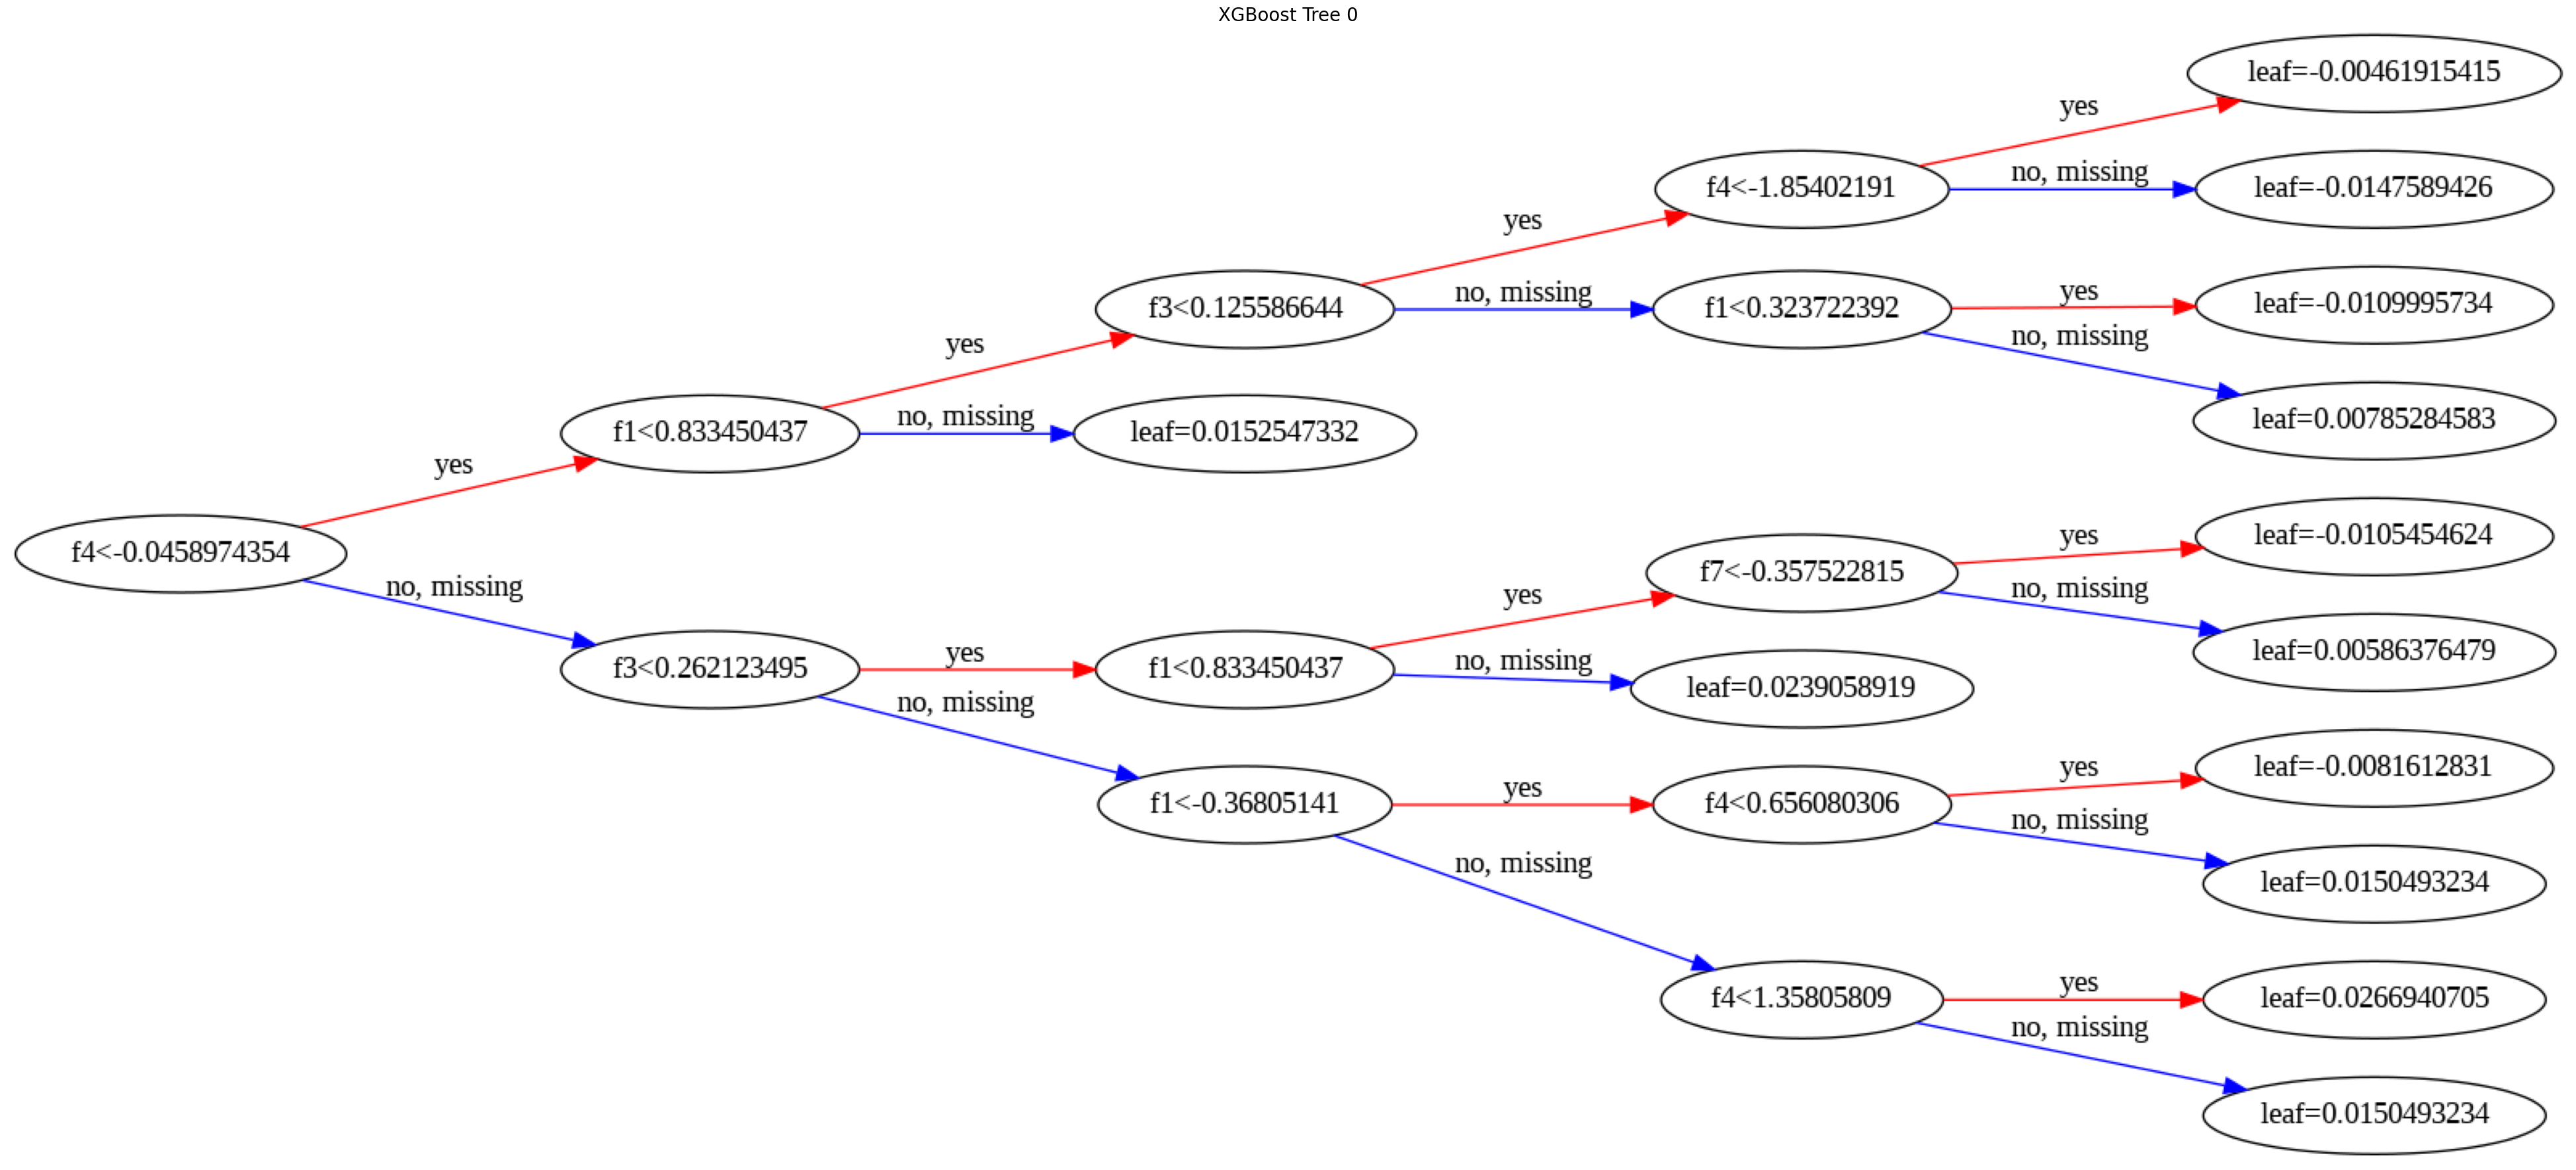

In [38]:
from xgboost import plot_tree
fig, ax = plt.subplots(figsize=(50, 30))
plot_tree(xgb, num_trees=0, ax=ax, rankdir='LR')
plt.title("XGBoost Tree 0", fontsize=20)
plt.show()


In [39]:
!pip install streamlit
!pip install pyngrok
!pip install streamlit pyngrok scikit-learn pandas numpy matplotlib seaborn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 140.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 130.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.4 MB/s eta 0:00:00


In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import pickle

url = 'https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv'
df = pd.read_csv(url)

X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = SVC(probability=True)
model.fit(X_train, y_train)

with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)


In [41]:
from google.colab import files
files.download('model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [42]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)
